In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('C:\\Anaconda\\Menu\\data.csv')

In [5]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
#How many unique carriers are there in our dataset?
data ['UniqueCarrier'].nunique() 

20

In [8]:
#We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights.
data.groupby(['Cancelled'])['FlightNum'].count()

Cancelled
0    6872294
1     137434
Name: FlightNum, dtype: int64

In [9]:
#Create new feature
data['DepHour'] = data['DepTime']//100
data['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [10]:
#Find top-10 carriers in terms of the number of completed flights
data[data['Cancelled']==0].groupby(['UniqueCarrier'])['FlightNum'].count().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: FlightNum, dtype: int64

In [11]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


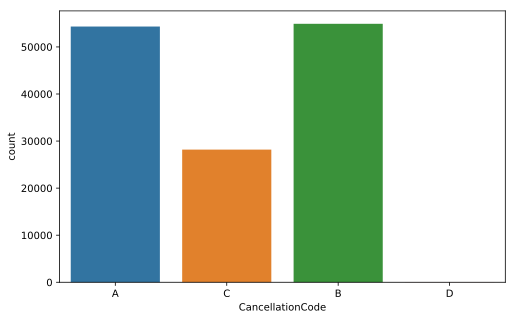

In [12]:
#Plot distributions of flight cancellation reasons (CancellationCode)
sns.countplot(data['CancellationCode']);

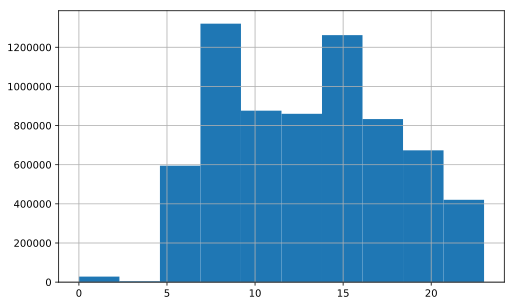

In [13]:
#Examine the hourly distribution of departure times
data['DepHour'].hist()

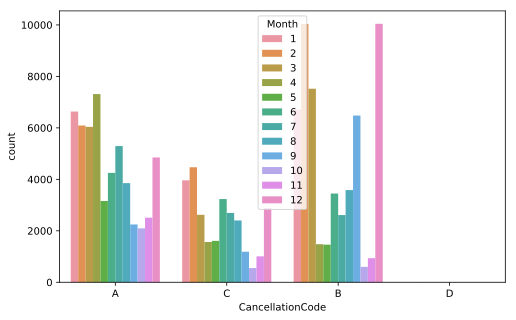

In [14]:
#Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months
sns.countplot(x='CancellationCode', hue='Month', data=data);

In [15]:
#Find top-5 delayed routes (count how many times they were delayed on departure).
data[data['DepDelay']>0].groupby(['Origin','Dest'])['DepDelay'].count().sort_values(
    ascending=False).iloc[:5]

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
Name: DepDelay, dtype: int64

In [16]:
#From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.
data1=data[((data['Origin']=='LAX') &(data['Dest']=='SFO')) | ((data['Origin']=='DAL') & (data['Dest']=='HOU')) | \
          ((data['Origin']=='SFO') &(data['Dest']=='LAX')) | ((data['Origin']=='ORD') &(data['Dest']=='LGA')) | \
          ((data['Origin']=='HOU') &(data['Dest']=='DAL')) ]

In [17]:
data1[data1['WeatherDelay']>0]['FlightNum'].count()

668